In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
print("Training Set:"% train.columns, train.shape, len(train))

Training Set: (31962, 3) 31962


In [2]:
test = pd.read_csv('test.csv')
print("Test Set:"% test.columns, test.shape, len(test))

Test Set: (17197, 2) 17197


In [3]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


# Data Cleaning

In [4]:
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

In [5]:
test_clean

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,white supremacists want everyone to see the ...
2,31965,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew el...
...,...,...
17192,49155,thought factory leftright polarisation trump u...
17193,49156,feeling like a mermaid hairflip neverready fo...
17194,49157,hillary campaigned today in ohioomg amp used w...
17195,49158,happy at work conference right mindset leads t...


In [6]:
train_clean

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,sikh temple vandalised in in calgary wso cond...


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Handling Imbalanced data

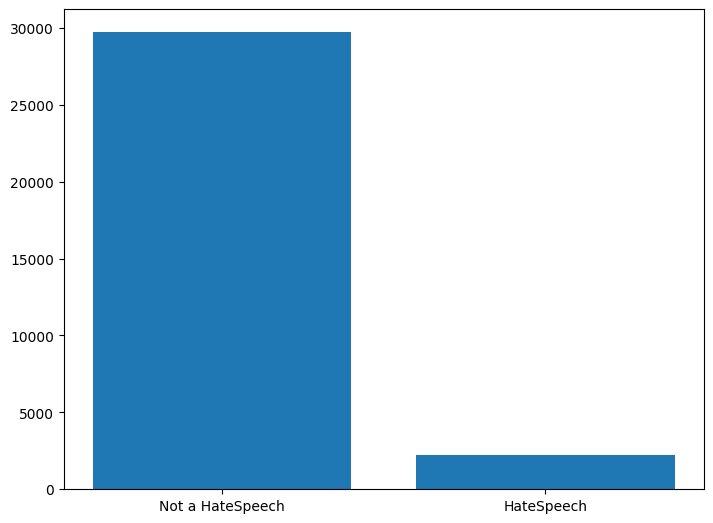

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Not a HateSpeech','HateSpeech']
data = [len(train_clean[train_clean.label==0]),len(train_clean[train_clean.label==1])]
ax.bar(langs,data)
plt.show()

In [9]:
from sklearn.utils import resample
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

label
1    29720
0    29720
Name: count, dtype: int64

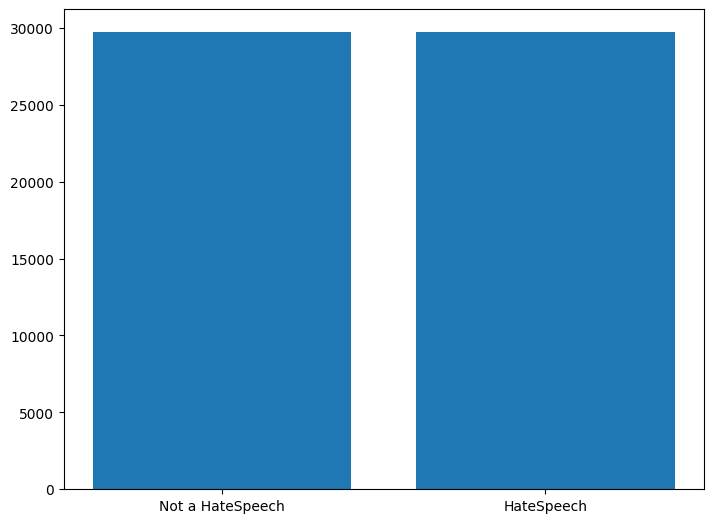

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Not a HateSpeech','HateSpeech']
data = [len(train_upsampled[train_upsampled.label==0]),len(train_upsampled[train_upsampled.label==1])]
ax.bar(langs,data)
plt.show()

# Pipeline

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'],
                                                    train_upsampled['label'],random_state = 0)

In [14]:
model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)

# Accuracy

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


# Precision

In [16]:
precision = precision_score(y_test, y_predict, average='weighted')
print(f"Precision: {precision:.2f}")

Precision: 0.97


# Recall

In [17]:
recall = recall_score(y_test, y_predict, average='weighted')
print(f"Recall: {recall:.2f}")

Recall: 0.97


# F1-Score

In [18]:
f1 = f1_score(y_test, y_predict, average='weighted')
print(f"F1-Score: {f1:.2f}")

F1-Score: 0.97


# Confusion Matrix

In [19]:
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[7129  361]
 [  98 7272]]
